# Perturbative unitarity with anyBSM (anyPerturbativeUnitarity)

In [1]:
from anyBSM import anyBSM
import anyBSM.plotting as plotting
import matplotlib
import matplotlib.pyplot as plt
from time import time

### Limit on Higgs Mass in the SM from perturbative unitarity

In [2]:
SM=anyBSM('SM', quiet=True, progress=False)
SM.eigSSSS() # calculates max(a_0)

0.01486227576836525

In [3]:
help(SM.eigSSSS)

Help on method eigSSSS in module anyBSM.anyPerturbativeUnitarity:

eigSSSS(ignore_scalars: list = [], parameters: dict = {}) -> float method of anyBSM.anyBSM.anyBSM instance
    Args:
         ignore_scalars: list of scalars to be excluded from the scatter matrix
         parameters: optionally run `anyBSM.anyModel.setparameters(parameters)` so set input parameters
    Return:
        smallest scattering eigenvalue in the s->infinity limit



In [4]:
SM.warnSSSS=False
Mh=list(range(10,1200,20))
a0=[SM.eigSSSS(parameters={'Mh':x}) for x in Mh]

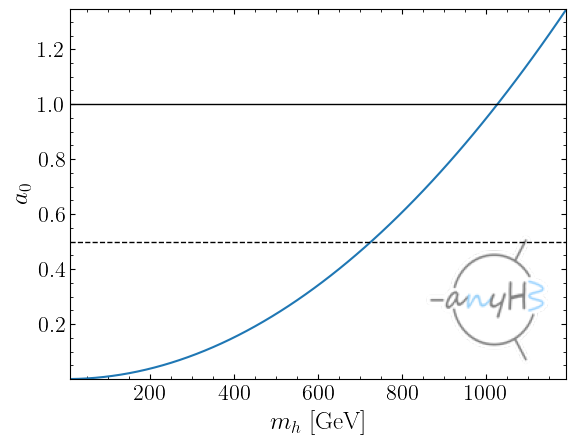

In [5]:
fig, ax = plt.subplots()
ax.plot(Mh,a0)
ax.axhline(y=0.5,color='black',lw=1,ls='--')
ax.axhline(y=1.0,color='black',lw=1,ls='-')
ax.set_xlabel(r'$m_h$ [GeV]',fontsize=18)
ax.set_ylabel(r'$a_0$',fontsize=18)
plt.margins(0,0)

### Calculate ${\mathrm max}(a_0)$ for all built-in models using default input parameters

In [6]:
for i in anyBSM.built_in_models:
    t1 = time()
    model=anyBSM(i, quiet=True,progress=False,ask=False)
    excl = []
    if i == 'MSSM':
        # for the MSSM we exclude all scalars except the doublet d.o.f.
        excl = [s for s in model.particles['S'] if s.name not in ['h1','h2','Ah1','Ah2','Hm1','Hm1c','Hm2','Hm2c']]
    a0=round(model.eigSSSS(ignore_scalars=excl),3)
    t2=time()
    print(f'model: {i:<22}',
          f' runtime (ms): {round(1000*(t2-t1),3):<10}',
          f' max(|a_0|) = {a0}'
         )

model: BmLSM                   runtime (ms): 29.285      max(|a_0|) = 0.017
model: GeorgiMachacek          runtime (ms): 581.083     max(|a_0|) = 0.078
model: GeorgiMachacekAligned   runtime (ms): 296.321     max(|a_0|) = 0.413
model: IDM                     runtime (ms): 63.46       max(|a_0|) = 0.255
model: MSSM                    runtime (ms): 3078.995    max(|a_0|) = 0.009
model: NTHDM                   runtime (ms): 71.101      max(|a_0|) = 0.151
model: SM                      runtime (ms): 10.694      max(|a_0|) = 0.015
model: SSM                     runtime (ms): 15.879      max(|a_0|) = 0.03
model: SSMZ2                   runtime (ms): 180.668     max(|a_0|) = 0.017
model: THDMFlipped             runtime (ms): 60.269      max(|a_0|) = 0.391
model: THDMI                   runtime (ms): 47.024      max(|a_0|) = 0.499
model: THDMII                  runtime (ms): 44.051      max(|a_0|) = 0.522
model: THDMLS                  runtime (ms): 42.73       max(|a_0|) = 0.391
model: TSM_Ye